In [1]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(100):
    env.render()
    env.step(env.action_space.sample())

/Users/nagataeiki/opt/anaconda3/envs/learning/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [16]:
#chainerでORを学習

import numpy as np
import chainer
import chainer.functions as F
import chainer.links as L
import chainer.initializer as I
from chainer import training
from chainer.training import extensions

    
class MyChain(chainer.Chain):
    def __init__(self):
        super(MyChain, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(2, 3)#入力2，中間層3
            self.l2 = L.Linear(3, 2)#中間層3，出力2
    def __call__(self, x):
        h1 = F.relu(self.l1(x))#ReLU関数
        y = self.l2(h1)
        return y        

epoch = 100
batchsize=4

#データの作成
trainx = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=np.float32)
trainy = np.array([0,1,1,1], dtype=np.int32)
train = chainer.datasets.TupleDataset(trainx, trainy)
test = chainer.datasets.TupleDataset(trainx, trainy)

In [17]:
# ニューラルネットワークの登録
model = L.Classifier(MyChain(), lossfun=F.softmax_cross_entropy)
#chainer.serializers.load_npz("result/out.model", model)
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

# イテレータの定義
train_iter = chainer.iterators.SerialIterator(train, batchsize)# 学習用
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)# 評価用
# アップデータの登録
updater = training.StandardUpdater(train_iter, optimizer)

# トレーナーの登録
trainer = training.Trainer(updater, (epoch, 'epoch'))

# 学習状況の表示や保存
trainer.extend(extensions.LogReport())#ログ
trainer.extend(extensions.Evaluator(test_iter, model))# エポック数の表示
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss','main/accuracy', 'validation/main/accuracy', 'elapsed_time'] ))#計算状態の表示
#trainer.extend(extensions.dump_graph('main/loss'))#ニューラルネットワークの構造
#trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'], 'epoch',file_name='loss.png'))#誤差のグラフ
#trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],'epoch', file_name='accuracy.png'))#精度のグラフ
#trainer.extend(extensions.snapshot(), trigger=(100, 'epoch'))# 学習再開のためのスナップショット出力
#chainer.serializers.load_npz("result/snapshot_iter_500", trainer)#再開用
#chainer.serializers.save_npz("result/out.model", model)

# 学習開始
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
1           0.752208    0.750766              0.25           0                         0.00500888    
2           0.750766    0.749332              0              0                         0.0100288     
3           0.749332    0.747906              0              0                         0.0158575     
4           0.747906    0.746488              0              0                         0.0249481     
5           0.746488    0.745077              0              0                         0.0324432     
6           0.745077    0.743675              0              0                         0.0387258     
7           0.743675    0.74228               0              0                         0.0520108     
8           0.74228     0.740894              0              0                         0.0585121     
9           0.740894    0.739516              0              0                      

In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
class MyChain(chainer.Chain):
    def __init__(self):
        super(MyChain, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(64, 100)
            self.l2 = L.Linear(100, 100)
            self.l3 = L.Linear(100, 10)
        
    def __call__(self, x):
        h1=F.relu(self.l1(x))
        h2=F.relu(self.l2(h1))
        y = self.l3(h2)
        return y
epoch=20
batchsize=100

digits = load_digits()
data_train, data_test, label_train ,label_test = train_test_split(digits.data, digits.target, test_size=0.2)
data_train = data_train.astype(np.float32)
data_test = data_test.astype(np.float32)
train = chainer.datasets.TupleDataset(data_train, label_train)
test = chainer.datasets.TupleDataset(data_test, label_test)

In [22]:
model = L.Classifier(MyChain(), lossfun=F.softmax_cross_entropy)
#chainer.serializers.load_npz("result/out.model", model)
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

# イテレータの定義
train_iter = chainer.iterators.SerialIterator(train, batchsize)# 学習用
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)# 評価用

# アップデータの登録
updater = training.StandardUpdater(train_iter, optimizer)

# トレーナーの登録
trainer = training.Trainer(updater, (epoch, 'epoch'))

# 学習状況の表示や保存
trainer.extend(extensions.LogReport())#ログ
trainer.extend(extensions.Evaluator(test_iter, model))# エポック数の表示
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss','main/accuracy', 'validation/main/accuracy', 'elapsed_time'] ))#計算状態の表示
#trainer.extend(extensions.dump_graph('main/loss'))#ニューラルネットワークの構造
#trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'], 'epoch',file_name='loss.png'))#誤差のグラフ
#trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],'epoch', file_name='accuracy.png'))#精度のグラフ
#trainer.extend(extensions.snapshot(), trigger=(100, 'epoch'))# 学習再開のためのスナップショット出力
#chainer.serializers.load_npz("result/snapshot_iter_500", trainer)#再開用
#chainer.serializers.save_npz("result/out.model", model)

# 学習開始
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
1           3.00107     1.35255               0.236667       0.553333                  0.0930358     
2           0.811325    0.541528              0.755714       0.8175                    0.162832      
3           0.363834    0.348152              0.894          0.906667                  0.261845      
4           0.225618    0.279121              0.94           0.920833                  0.339103      
5           0.167101    0.243722              0.953571       0.930833                  0.404189      
6           0.133985    0.204815              0.961333       0.9425                    0.467817      
7           0.104447    0.184905              0.97           0.949167                  0.532126      
8           0.0862895   0.165434              0.976429       0.953333                  0.59962       
9           0.0698766   0.157184              0.987333       0.9675                 

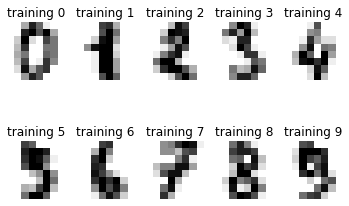

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]]


In [27]:
import matplotlib.pyplot as plt
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2,5, index+1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.axis("off")
    plt.title('training {}'.format(label))
plt.show()

print(digits.data)
print(digits.target)
print(digits.data.shape)
print(digits.data[0])
print(digits.data.reshape((len(digits.data), 1, 8,8))[0])

In [28]:
class MyChain(chainer.Chain):
    def __init_(self):
        super(Mychain, self).__init__()
        with self.init_scope():
            self.conv1 = L.Convolution2D(1,16,3,1,1)
            self.conv2 = L.Convolution2D(16,64,3,1,1)
            self.l3 = L.Linear(256, 10)
            
    def __call__(self, x):
        h1 = F.max_pooling_2d(F.relu(self.conv1(x)),2,2)
        h2 = F.max_pooling_2d(F.relu(self.conv2(h2)), 2,2)
        y = self.l3(h2)
        return y
    
epoch=20
batchsize=100
digits = load_digits()
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target, test_size=0.2)
data_train = data_train.reshape((len(data_train), 1, 8,8))
data_test = data_test.reshape((len(data_test), 1, 8,8))